<a href="https://colab.research.google.com/github/gri11/aihack/blob/main/aihack_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Environment

In [ ]:
!pip install -Uqq fastai

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [ ]:
%%capture
!wget "https://raw.githubusercontent.com/HEKYPTO/Temp/main/train.csv?raw=True"
!wget "https://raw.githubusercontent.com/HEKYPTO/Temp/main/test.csv?raw=True"
!wget "https://raw.githubusercontent.com/HEKYPTO/Temp/main/submission_sample.csv?raw=True"

# Data Evaluation

##Header

In [ ]:
df = pd.read_csv("train.csv?raw=True")

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


##Columms

In [ ]:
" ".join(list(df.columns))

'id age job marital education default balance housing loan contact month duration campaign pdays previous poutcome y'

##Missing Value Search

In [ ]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##General Data Statistics Value

In [ ]:
df.describe()
#df.info()

,id,age,balance,duration,campaign,pdays,previous
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,2000.000000,41.204551,1416.183796,261.906477,2.780695,39.365341,0.540385
std,1154.556192,10.580862,3017.975038,258.845954,3.083492,99.533237,1.651415
min,1.000000,19.000000,-2082.000000,4.000000,1.000000,-1.000000,0.000000
25%,1000.500000,33.000000,68.000000,104.000000,1.000000,-1.000000,0.000000
50%,2000.000000,39.000000,445.000000,184.000000,2.000000,-1.000000,0.000000
75%,2999.500000,49.000000,1470.000000,325.500000,3.000000,-1.000000,0.000000
max,3999.000000,87.000000,71188.000000,3025.000000,50.000000,871.000000,24.000000


#Data Visualisation

##Quantity Data

In [ ]:
def heat_map_plt(dataset):
  plt.figure(figsize=(12, 9))
  sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu", linewidth=.7)

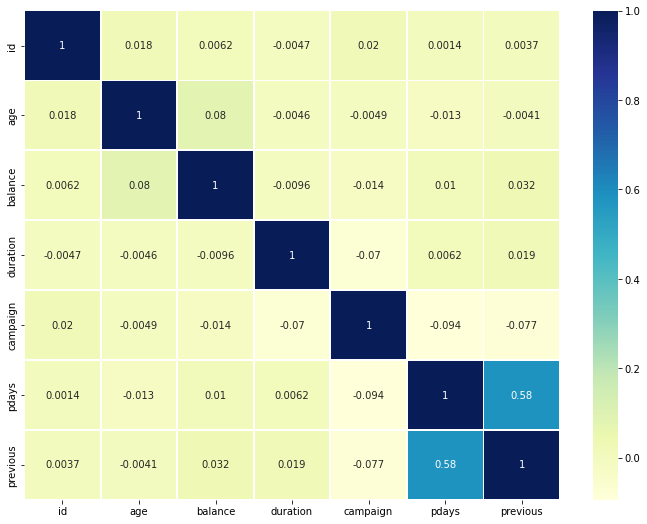

In [ ]:
heat_map_plt(df)

In [ ]:
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return [(Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)]

    #df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
def plot_with_features(dfm, column, show_outlier=False):
    f, ax = plt.subplots(nrows= int(len(column) / 2) + len(column) % 2, ncols=2, figsize=(15, 15))
    for i in range(len(column)):
        ax[int(i / 2), i % 2].scatter([i for i in range(len(dfm))], dfm[column[i]], edgecolor="white", linewidth=.5)
        ax[int(i / 2), i % 2].set_xlabel("id")
        ax[int(i / 2), i % 2].set_ylabel(column[i])
        if show_outlier:
            lower, upper = outlier(dfm[column[i]])
            ax[int(i / 2), i % 2].plot([i for i in range(len(dfm))], [lower for i in range(len(dfm))], color = "red")
            ax[int(i / 2), i % 2].plot([i for i in range(len(dfm))], [upper for i in range(len(dfm))], color = "red")
    f.tight_layout()
    plt.show()


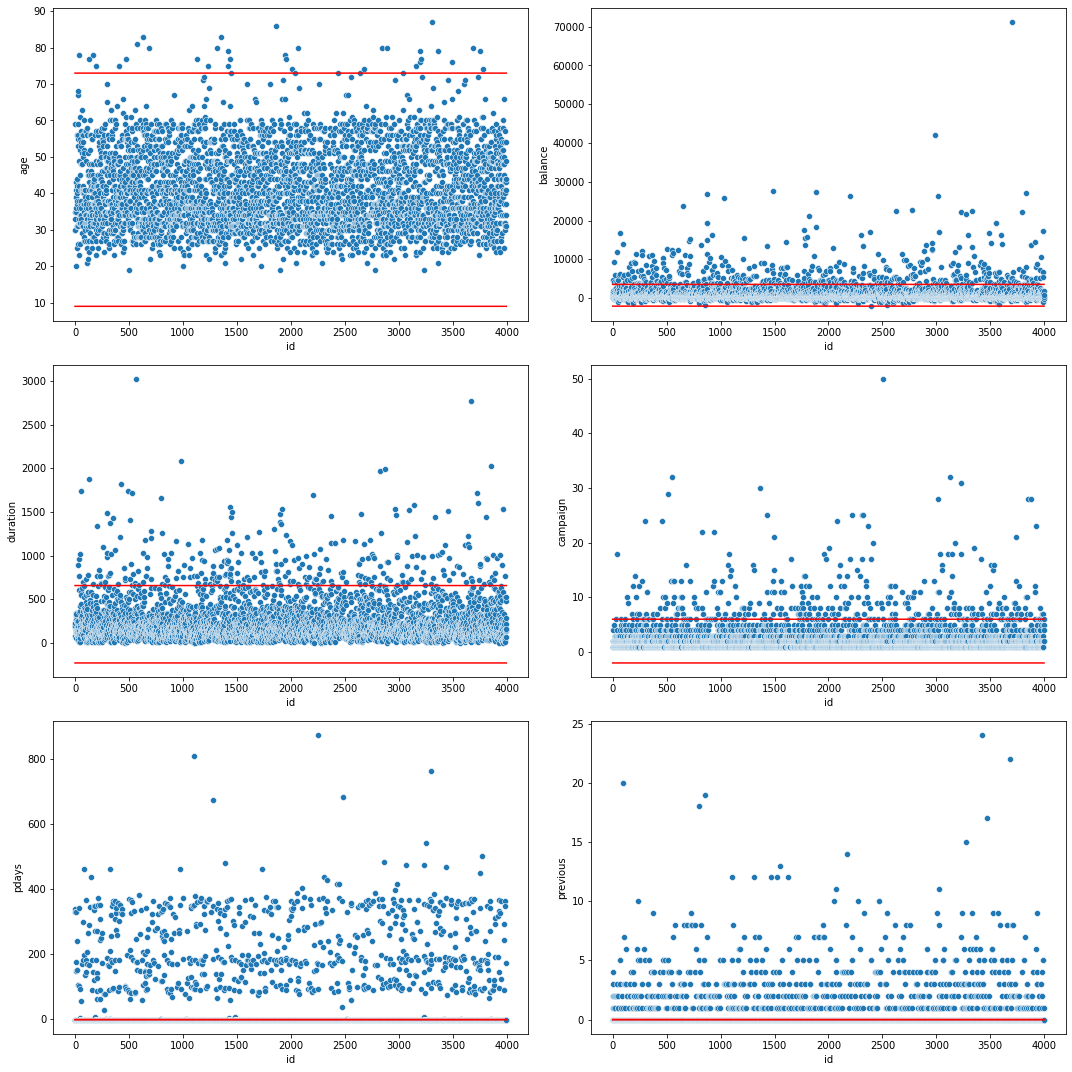

In [ ]:
plot_with_features(df, ["age", "balance", "duration", "campaign", "pdays", "previous"], True)

##Quality Data

In [ ]:
def piechart_with_features(dfm, column):
    f, ax = plt.subplots(nrows= int(len(column) / 2) + len(column) % 2, ncols=2, figsize=(15, 15))
    for i in range(len(column)):
        count_map = {}
        for e in dfm[column[i]]:
            if e not in count_map:
                count_map[e] = 0
            else:
                count_map[e] += 1
        ax[int(i / 2), i % 2].pie(count_map.values(), labels=count_map.keys(), autopct="%.2f%%")
        ax[int(i / 2), i % 2].set_xlabel(column[i])
    f.tight_layout()
    plt.show()

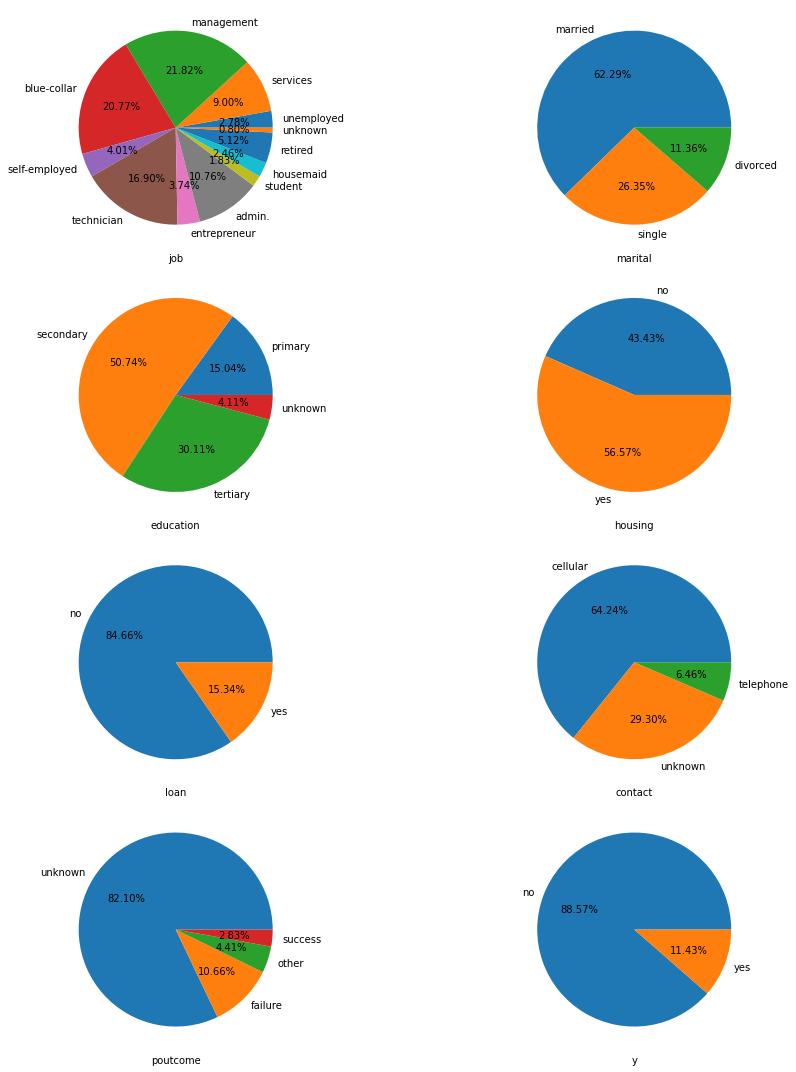

In [ ]:
piechart_with_features(df, ["job", "marital", "education", "housing", "loan", "contact", "poutcome", "y"])

#Drop features and encoding features

In [ ]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#Select comparative value

we use column y as y_train value

In [ ]:
ydf = df.groupby('y', group_keys=False).apply(lambda x: x.sample(len(df[df['y'] == "yes"])))

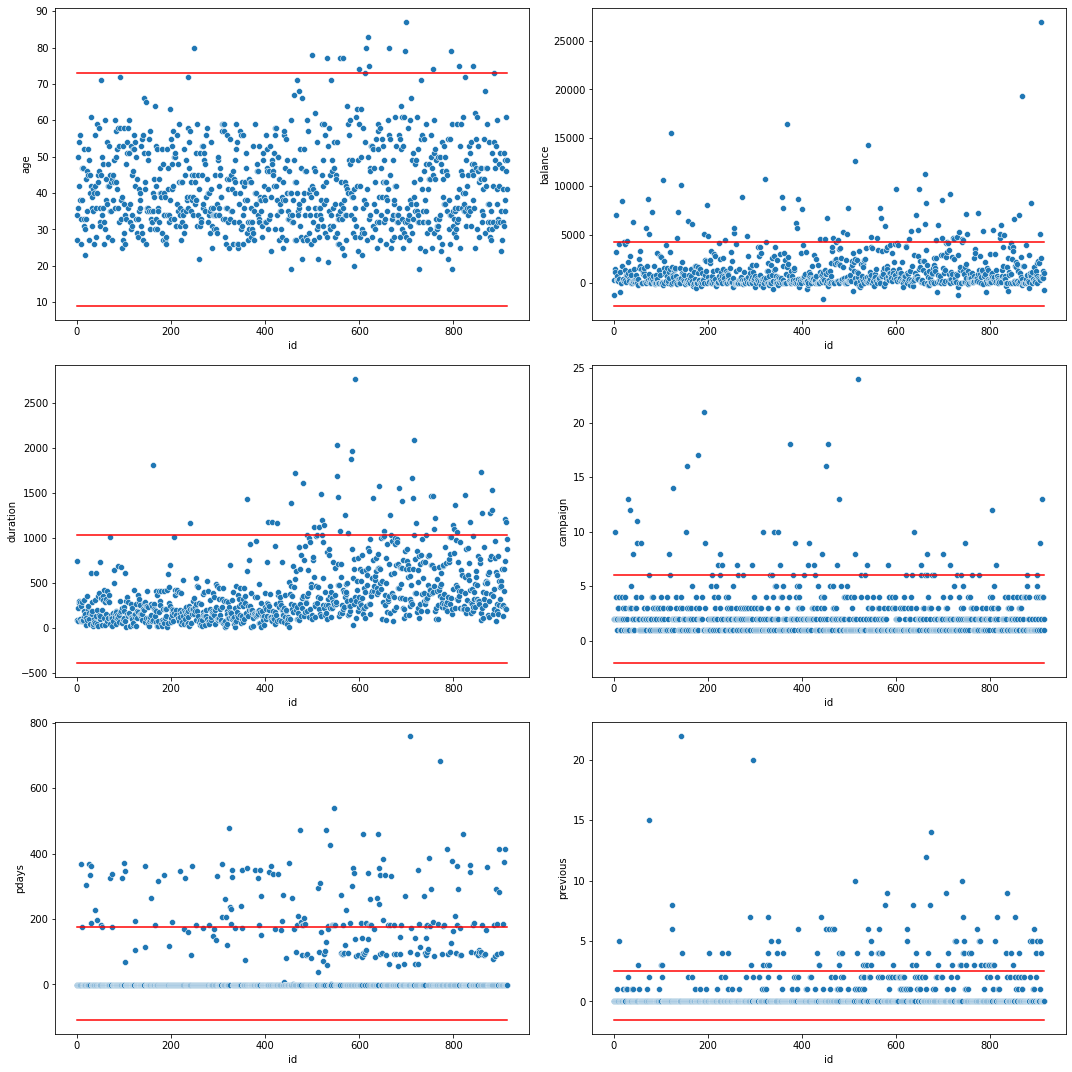

In [ ]:
plot_with_features(ydf, ["age", "balance", "duration", "campaign", "pdays", "previous"], True)

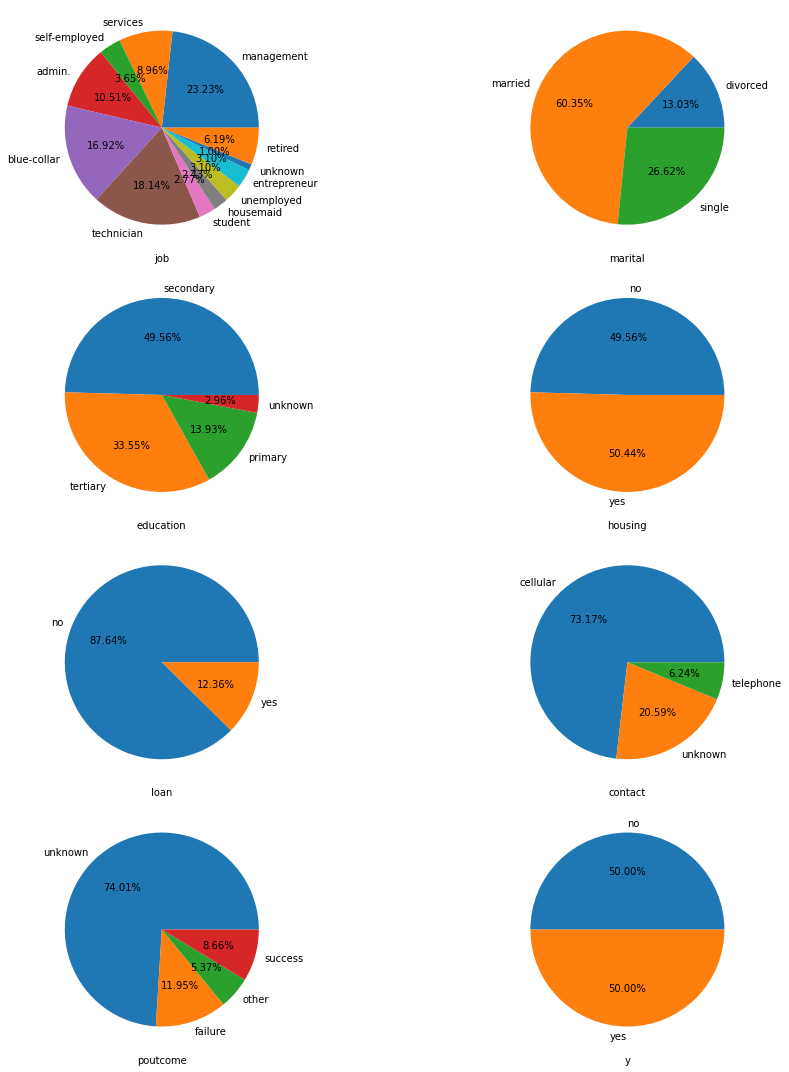

In [ ]:
piechart_with_features(ydf, ["job", "marital", "education", "housing", "loan", "contact", "poutcome", "y"])

# Preprocess data
### Dropped Features
1. id - not so meaningful info
2. duration - should be discarded because we get this info after the result happenend.
3. job - too many of them
4. month - provide useful info?

### Encoded features
1. pdays - aware of meaning of numeric

  one-hot:
  *   contact



### TODO: Maybe drop outliner (stat101)
### To Improve: Maybe there're many unknown value?




###Method 0:

Outlier

In [ ]:
def remove_outlier(dfm, column):
    df_copy = dfm.copy()
    outlier_value = []
    for e in column:
        outlier_value.append(outlier(df[e]))
    for i in range(len(column)):
        df_copy = df_copy[~((df_copy[column[i]] < outlier_value[i][0]) | (df_copy[column[i]] > outlier_value[i][1]))]
    return df_copy

In [ ]:
rdf = remove_outlier(ydf, ["balance", "duration", "campaign"])

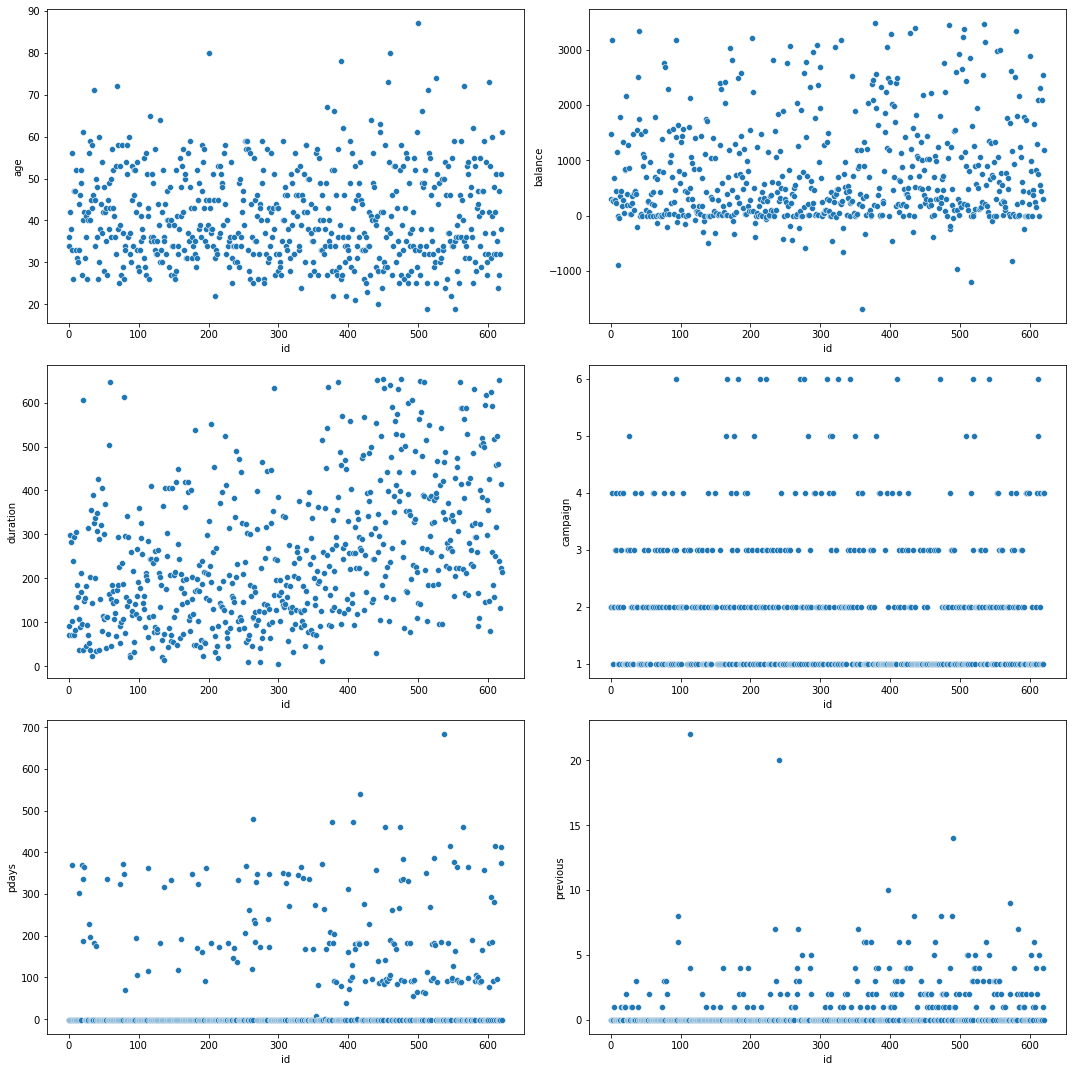

In [ ]:
plot_with_features(rdf, ["age", "balance", "duration", "campaign", "pdays", "previous"])

In [ ]:
len(rdf)

621

Encoding

In [ ]:
tf = rdf
#month_encoded
month_list = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
mapped_month = {month_list[i]: i + 1 for i in range(len(month_list))}
tf["month"] = tf["month"].apply(mapped_month.get)

#dafault encoded
tf["default"] = tf["default"].apply(lambda x: 0 if x == "no" else 1)
#housing encoded
tf["housing"] = tf["housing"].apply(lambda x: 0 if x == "no" else 1)
#loan encoded
tf["loan"] = tf["loan"].apply(lambda x: 0 if x == "no" else 1)
#job encoded
tf["job"] = tf["job"].astype("category").cat.codes
#y encoded
tf["y"] = tf["y"].apply(lambda x: 0 if x == "no" else 1)
#education encoded -> one hot
#contact encoded -> one hot
#marital encoded -> one hot
#poutome encoded -> one hot
tf_oh = pd.get_dummies(tf, columns=["education", "contact", "marital", "poutcome"])
#tf_oh.drop(["education", "contact", "marital", "poutcome"], axis=1)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.25
#threshold_n* (1 - threshold_n)
sel = VarianceThreshold(threshold=threshold_n)
sel_var=sel.fit_transform(tf_oh)
tf_new = tf_oh[tf_oh.columns[sel.get_support(indices=True)]]

Dropped Features

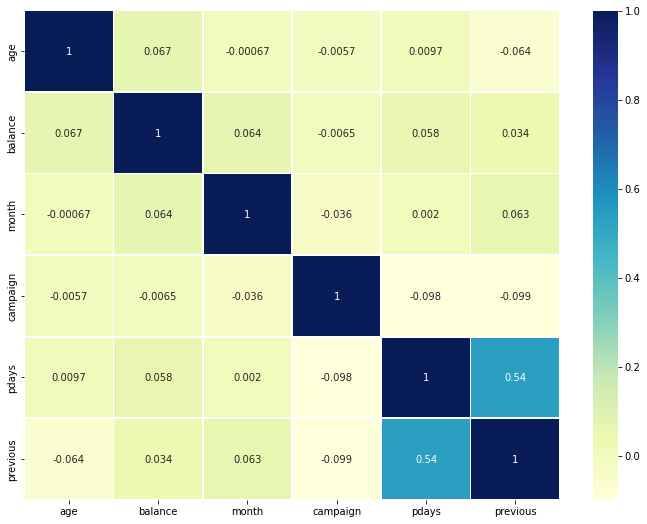

In [ ]:
#according to dropped features analysis
tf_drop = tf_new.drop(["id", "duration", "job"], axis=1)
heat_map_plt(tf_drop)

In [ ]:
print(len(tf_drop.columns), len(tf_drop))

6 621


In [ ]:
# Zoon Data
zf = tf_drop
zf['y'] = tf_oh['y']
zf

,age,balance,month,campaign,pdays,previous,y
3154,34,291,8,2,-1,0,0
3285,36,1477,8,2,-1,0,0
1385,42,3165,6,4,-1,0,0
2638,38,290,4,1,-1,0,0
646,56,272,8,2,-1,0,0
...,...,...,...,...,...,...,...
80,27,451,7,1,-1,0,1
37,32,2089,11,1,-1,0,1
1767,51,297,5,4,375,1,1
2988,38,2543,8,1,414,4,1


###Method 1:
* use only valid info features
* feature that has 'unknown': cat features
* pdays?

|cat|unknown|
---|---
|marital |0 |
|edu|165 |
|default|0|
|housing|0|
|loan|0|
|contact|1172|
|month|0|
|poutcome|3281|

In [ ]:
# id age job marital education default balance housing loan contact month duration campaign pdays previous poutcome y

In [ ]:
rdf = remove_outlier(df, ["balance", "duration", "campaign", "previous"])
len(rdf)

2497

In [ ]:
cat_names =  ['marital', 'education', 'default', 'housing', 'loan']
cont_names = ['age', 'balance', 'campaign', 'pdays', 'previous']

In [ ]:
# has many unknown
df['poutcome'].value_counts()

unknown    3281
failure     427
other       177
success     114
Name: poutcome, dtype: int64

In [ ]:
dfc = []
for c in cat_names:
  dfc.append(df[c].value_counts())

In [ ]:
dfc

[married     2490
 single      1054
 divorced     455
 Name: marital, dtype: int64, secondary    2028
 tertiary     1204
 primary       602
 unknown       165
 Name: education, dtype: int64, no     3930
 yes      69
 Name: default, dtype: int64, yes    2262
 no     1737
 Name: housing, dtype: int64, no     3385
 yes     614
 Name: loan, dtype: int64]

In [ ]:
tf['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [ ]:
RANDOM_STATE = 42

# encode func education
def encode_education(x):
  if x == 'primary':
    return 1
  elif x == 'secondary':
    return 2
  elif x == 'tertiary':
    return 3
  else:
    return 0

def preprocess_g(df):
  # features use
  cat_names =  ['marital', 'education', 'default', 'housing', 'loan']
  cont_names = ['age', 'balance', 'campaign', 'pdays', 'previous']

  # cdf: df w/ only use features (include outliner)
  cdf = df[cat_names + cont_names + ['y']]

  # drop the row that has education == unknown
  # cdf = cdf[cdf['education'] != 'unknown']

  # encode
  tf = cdf.copy()

  tf["default"] = tf["default"].apply(lambda x: 0 if x == "no" else 1)
  tf["housing"] = tf["housing"].apply(lambda x: 0 if x == "no" else 1)
  tf["loan"] = tf["loan"].apply(lambda x: 0 if x == "no" else 1)
  tf['pdays'] = tf['pdays'].apply(lambda x: 999 if x == -1 else x) # or just drop pdays
  tf["education"] = tf["education"].apply(encode_education) # unknown -> 0
  
  tf = pd.get_dummies(tf, columns=["marital"])

  tf["y"] = tf["y"].apply(lambda x: 0 if x == "no" else 1)
  
  return tf

In [ ]:
tf = preprocess_g(df)

rdf = remove_outlier(tf, ["balance"]) # rdf: tf remove outliner; balance

## Imbalance Fix
By Downsample y = 0

In [ ]:
# tdf: dataset use
tdf = tf
# tdf = rdf # remove outliner
tdf_0 = tf[tf['y'] == 0]
tdf_1 = tf[tf['y'] == 1]
print(tdf_0.shape, tdf_1.shape)

t_vc = tdf['y'].value_counts()
print(t_vc)
print(t_vc[1]/(t_vc[0]+t_vc[1])) # moderate

(3541, 13) (458, 13)
0    3541
1     458
Name: y, dtype: int64
0.1145286321580395


In [ ]:
from sklearn.utils import resample

tdf_0_downsample = resample(tdf_0,
             replace=True,
             n_samples=len(tdf_1),
             random_state=RANDOM_STATE)

print(tdf_0_downsample.shape, tdf_1.shape)

(458, 13) (458, 13)


In [ ]:
tdf_downsample = tdf_0_downsample.append(tdf_1)
tdf_downsample.shape

(916, 13)

In [ ]:
remove_outlier(tdf_downsample, ["balance"]).shape # rdf: tf remove outliner; balance

(797, 13)

##Minority Expansion

In [ ]:
def minority_expansion(dfm, column, major_val, minor_val, RAND_STATE=42):
    import warnings
    warnings.filterwarnings('ignore')
    minor = dfm[dfm[column] == minor_val]
    major = dfm[dfm[column] == major_val]
    folds = int(len(major) / len(minor))
    residue = len(major) - len(minor) * folds
    for i in range(folds):
        major = major.append(minor, ignore_index=True)
    major = major.append(minor.sample(n = residue, random_state=RAND_STATE), ignore_index=True)
    return major.sample(frac=1, random_state=RAND_STATE)

In [ ]:
mi_ex = minority_expansion(tf, "y", 0, 1)

##Random Reshuffle

In [ ]:
def random_reshuffle(dfm, column, major_val, minor_val, RAND_STATE=42):
    import warnings
    import random
    warnings.filterwarnings('ignore')
    minor = dfm[dfm[column] == minor_val]
    major = dfm[dfm[column] == major_val]
    random.seed(RANDOM_STATE)
    random_select = random.randint(0, len(major))
    new_frame = pd.DataFrame()
    for i in range(random_select):
        new_frame = new_frame.append(minor.sample(n=1), ignore_index=True)
    for i in range(len(dfm) - random_select):
        new_frame = new_frame.append(major.sample(n=1), ignore_index=True)
    return new_frame.sample(frac=1, random_state=RANDOM_STATE)

In [ ]:
rd_re = random_reshuffle(tf, "y", 0, 1)

# Split data: stratified & k-fold

In [ ]:
# split data: stratified & k-fold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# x, y
x = tdf_downsample.drop(columns='y', axis=1)
y = tdf_downsample['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # apply scaling on training data
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler

StandardScaler()

In [ ]:
len(x_train), len(x_test)

(732, 184)

In [ ]:
y_train.value_counts() # so imbalance na

1    366
0    366
Name: y, dtype: int64

In [ ]:
# y_vc = y_train.value_counts()
y_vc = y.value_counts()
y_vc[1]/(y_vc[0]+y_vc[1]) # balanced

0.5

# Model Selection (sklearn)
score so bad jung

In [ ]:
def test_regression(dfm, column, config=False):
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import LogisticRegressionCV
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier

    RANDOM_STATE = 42

    x = dfm.drop(columns=column, axis=1)
    y = dfm[column]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train) # apply scaling on training data
    x_test_scaled = scaler.transform(x_test)

    c = 0

    print("logistic classifier")
    clf = LogisticRegressionCV(cv=5, random_state=RANDOM_STATE, scoring='f1')
    score = cross_val_score(clf, x_train_scaled, y_train, cv=5, scoring='f1')
    print(score)
    a = score
    c += score.sum()

    print("random forest classifier")
    ranf = RandomForestClassifier(random_state=RANDOM_STATE)
    score = cross_val_score(ranf, x_train, y_train, scoring="f1", cv=5)
    print(score)
    b = score
    c += score.sum()

    print("xgb classifier")
    xgb = XGBClassifier(random_state=RANDOM_STATE)
    score = cross_val_score(xgb, x_train, y_train, scoring="f1", cv=5)
    print(score)
    d = score
    c += score.sum()

    if config:
      return c, [a, b, d]

    return scaler

In [ ]:
test_regression(zf, 'y')

logistic classifier
[0.4516129  0.45454545 0.36363636 0.33898305 0.5       ]
random forest classifier
[0.62162162 0.5974026  0.61333333 0.58227848 0.58227848]
xgb classifier
[0.58333333 0.56716418 0.55555556 0.54794521 0.54794521]


StandardScaler()

In [ ]:
zf.shape

(621, 7)

In [ ]:
test_regression(tdf_downsample, 'y')

logistic classifier
[0.59854015 0.70344828 0.56338028 0.58208955 0.5890411 ]
random forest classifier
[0.56338028 0.64705882 0.59459459 0.59459459 0.57553957]
xgb classifier
[0.55474453 0.66197183 0.58741259 0.57142857 0.60689655]


StandardScaler()

In [ ]:
test_regression(mi_ex, "y")

logistic classifier
[0.63881151 0.62557498 0.62943262 0.64208633 0.62206148]
random forest classifier
[0.95206056 0.96258503 0.96101695 0.95857988 0.95374264]
xgb classifier
[0.69188192 0.68194842 0.69391462 0.69051878 0.6953405 ]


StandardScaler()

In [ ]:
test_regression(rd_re, "y")

logistic classifier
[0.79286422 0.7854251  0.78708375 0.79877426 0.79919679]
random forest classifier
[0.94845361 0.92849035 0.94252874 0.93799324 0.95281933]
xgb classifier
[0.83018868 0.80932203 0.82916213 0.82666667 0.83459459]


StandardScaler()

In [ ]:
state = []
for i in range(1234):
  dst = random_reshuffle(tf, "y", 0, 1, i)
  c, li = test_regression(dst, "y", True)
  state.append([-c, li, i])

print(sorted(state))

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
clf = LogisticRegressionCV(cv=5, random_state=RANDOM_STATE, scoring='f1')
cross_val_score(clf, x_train_scaled, y_train, cv=5, scoring='f1')

array([0.59854015, 0.70344828, 0.56338028, 0.58208955, 0.5890411 ])

In [ ]:
ranf = RandomForestClassifier(random_state=RANDOM_STATE)
cross_val_score(ranf, x_train, y_train, scoring="f1", cv=5)

array([0.56338028, 0.64705882, 0.59459459, 0.59459459, 0.57553957])

In [ ]:
xgb = XGBClassifier(random_state=RANDOM_STATE)
cross_val_score(xgb, x_train, y_train, scoring="f1", cv=5)

array([0.55474453, 0.66197183, 0.58741259, 0.57142857, 0.60689655])

# Model Fine-tune

## fastai model (deep learning)
Approch 1: not so good, high valid_loss, acc= 0.79

In [ ]:
from fastai.tabular.all import *

In [ ]:
# Approch 1
# cat_names =  ['marital', 'education', 'default', 'housing', 
#               'loan', 'contact', 'month', 'poutcome']

# cont_names = ['age', 'balance', 'campaign', 'pdays', 'previous']

# Approch 2
cat_names =  ['marital', 'education', 'default', 'housing', 'loan']

cont_names = ['age', 'balance', 'campaign', 'pdays', 'previous']

y_names = 'y'

splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names=y_names,
                   splits=splits)

to.xs.iloc[:2]

,marital,education,default,housing,loan,age,balance,campaign,pdays,previous
3659,2,2,1,1,1,1.021934,-0.441795,-0.258191,-0.401225,-0.32466
1278,2,2,1,2,1,1.209623,-0.764260,-0.589337,-0.401225,-0.32466


In [ ]:
dls = to.dataloaders(bs=64)

dls.show_batch()

,marital,education,default,housing,loan,age,balance,campaign,pdays,previous,y
0,single,primary,no,yes,no,34.0,463.999977,1.0,299.000003,2.000000e+00,no
1,single,tertiary,no,yes,no,34.0,925.000014,1.0,-0.999999,-2.306214e-08,yes
2,single,tertiary,no,yes,no,34.0,871.999998,2.0,-0.999999,-2.306214e-08,no
3,married,secondary,no,no,yes,33.0,575.000018,2.0,-0.999999,-2.306214e-08,no
4,married,secondary,no,no,no,58.0,35.000022,7.0,-0.999999,-2.306214e-08,no
5,single,secondary,no,no,yes,32.0,-0.000038,2.0,-0.999999,-2.306214e-08,no
6,married,tertiary,no,no,no,34.0,-0.000038,1.0,187.999995,1.000000e+00,no
7,married,tertiary,no,no,no,46.0,2262.000012,14.0,-0.999999,-2.306214e-08,no
8,married,primary,no,yes,no,59.0,-0.000038,2.0,-0.999999,-2.306214e-08,no
9,married,primary,no,yes,yes,50.0,341.000026,4.0,339.999999,2.000000e+00,yes


Approch 2

In [ ]:
learn2 = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn2.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.708885,0.671504,0.723404,00:02


In [ ]:
learn2.show_results()

,marital,education,default,housing,loan,age,balance,campaign,pdays,previous,y,y_pred
0,2.0,2.0,1.0,2.0,1.0,0.083492,-0.348552,0.072956,-0.401225,-0.324660,0.0,0.0
1,1.0,3.0,1.0,2.0,1.0,0.458869,-0.389670,-0.589337,3.093978,0.281473,0.0,1.0
2,2.0,2.0,1.0,2.0,2.0,-0.104196,0.028304,-0.589337,-0.401225,-0.324660,0.0,0.0
3,2.0,3.0,1.0,2.0,1.0,1.303467,-0.407153,1.066394,-0.401225,-0.324660,0.0,0.0
4,2.0,3.0,1.0,1.0,1.0,0.928090,-0.463487,2.059833,-0.401225,-0.324660,0.0,0.0
5,2.0,2.0,1.0,2.0,1.0,0.834246,0.288607,-0.589337,-0.401225,-0.324660,0.0,0.0
6,2.0,2.0,1.0,2.0,1.0,1.678844,1.384858,-0.258191,-0.401225,-0.324660,0.0,0.0
7,2.0,4.0,1.0,1.0,1.0,1.209623,-0.172751,-0.589337,-0.401225,-0.324660,1.0,0.0
8,2.0,2.0,2.0,1.0,2.0,-0.010352,-0.229409,-0.589337,-0.401225,-0.324660,1.0,0.0


Approch 1

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.637155,0.608400,0.846058,00:01


In [ ]:
learn.show_results()

,marital,education,default,housing,loan,age,balance,campaign,pdays,previous,y,y_pred
0,2.0,2.0,1.0,1.0,1.0,1.772688,-0.130662,1.728687,-0.401225,-0.324660,0.0,0.0
1,3.0,3.0,1.0,2.0,1.0,-0.761106,-0.484208,-0.589337,-0.401225,-0.324660,0.0,0.0
2,2.0,3.0,1.0,1.0,1.0,1.678844,2.670186,-0.258191,-0.401225,-0.324660,1.0,1.0
3,1.0,2.0,1.0,2.0,1.0,0.834246,-0.102818,-0.589337,-0.401225,-0.324660,0.0,0.0
4,2.0,1.0,1.0,1.0,1.0,0.365025,-0.287038,0.735248,3.144487,1.493737,0.0,0.0
5,2.0,1.0,1.0,2.0,1.0,1.585000,-0.455069,1.066394,-0.401225,-0.324660,0.0,0.0
6,3.0,3.0,1.0,1.0,1.0,-0.291885,-0.017993,0.404102,-0.401225,-0.324660,0.0,0.0
7,2.0,3.0,1.0,2.0,1.0,0.177336,0.433328,1.397541,-0.401225,-0.324660,0.0,0.0
8,2.0,2.0,1.0,2.0,2.0,0.552713,-0.428845,-0.258191,-0.401225,-0.324660,0.0,0.0


Approach 3

In [ ]:
import sklearn.metrics as skm
def binaccu():
    return skm_to_fastai(skm.accuracy_score)

In [ ]:

cont_names = ['age', 'balance', 'campaign', 'pdays', 'previous']
y_names = 'y'

splits = RandomSplitter(valid_pct=0.1)(range_of(tf_drop))
fo = TabularPandas(tf_drop, procs=[Categorify, FillMissing, Normalize],
                  cont_names = cont_names,
                  y_names=y_names,
                  splits=splits)
dls = fo.dataloaders(bs=64)
learn = tabular_learner(dls, n_out=1, metrics=[binaccu()])
learn.fit_one_cycle(10, 1e-3)
learn.show_results()


epoch,train_loss,valid_loss,accuracy_score,time
0,0.730742,0.471145,0.580645,00:00
1,0.640265,0.472818,0.580645,00:00
2,0.567696,0.434910,0.580645,00:00
3,0.511037,0.389129,0.580645,00:00
4,0.466484,0.345084,0.580645,00:00
5,0.432295,0.335738,0.580645,00:00
6,0.400886,0.314654,0.580645,00:00
7,0.375465,0.315588,0.580645,00:00
8,0.357276,0.311741,0.580645,00:00
9,0.342345,0.313835,0.580645,00:00


,age,balance,campaign,pdays,previous,y,y_pred
0,0.705852,2.012264,3.442579,-0.524713,-0.418151,0.0,0.599677
1,-1.001082,-0.825752,-0.814947,-0.524713,-0.418151,0.0,0.023284
2,0.705852,-0.405998,0.036558,-0.524713,-0.418151,0.0,-0.035462
3,-0.641727,-0.787192,-0.814947,0.063428,0.535916,0.0,0.606138
4,-0.731566,-0.679224,-0.814947,-0.524713,-0.418151,1.0,0.007290
5,0.256659,-0.708970,0.036558,-0.524713,-0.418151,0.0,-0.018017
6,-0.731566,1.830482,-0.814947,0.836414,0.058883,1.0,0.384542
7,-1.270597,-0.766259,-0.814947,2.592436,0.058883,0.0,0.001735
8,-1.270597,0.050111,0.888063,-0.524713,-0.418151,0.0,0.154898


SuggestedLRs(valley=0.001737800776027143)

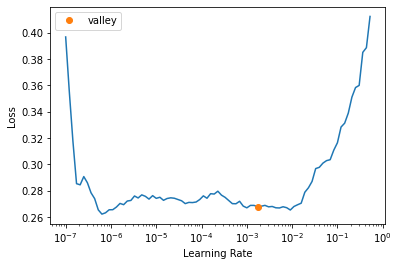

In [ ]:
learn.lr_find()

In [ ]:
from sklearn.metrics import confusion_matrix
preds, targs = learn.get_preds()
m = nn.Sigmoid()
confusion_matrix(torch.round(m(preds.view(-1))).numpy(), targs.view(-1).numpy())

array([[ 8,  4],
       [28, 22]])

In [ ]:
tf_drop["y"].value_counts()
#VERY BAD NOW

0    366
1    255
Name: y, dtype: int64

## XGBoost


In [ ]:
def getXYScaler(df, target):
  x = df.drop(columns=target, axis=1)
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train) # apply scaling on training data
  x_test_scaled = scaler.transform(x_test)
  return x_train, x_test, y_train, y_test, x_train_scaled, x_test_scaled, scaler

In [ ]:
def gridsearch_model(df, target, model, param_grid, scaled=False):
  x = df.drop(columns=target, axis=1)
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train) # apply scaling on training data
  x_test_scaled = scaler.transform(x_test)
  clf = GridSearchCV(model, param_grid, scoring='f1', cv=10)
  if(scaled): clf.fit(x_train_scaled, y_train)
  else: clf.fit(x_train, y_train)
  return clf.best_estimator_

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_cm(df, model, scaled=False):
  x_train, x_test, y_train, y_test, x_train_scaled, x_test_scaled, scaler = getXYScaler(df, 'y')
  if(scaled): y_pred = model.predict(x_test_scaled)
  else: y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
  disp.plot()
  plt.show()

### Grid Search for each dataset

In [ ]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}
xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb_tdf = gridsearch_model(tdf_downsample, 'y', xgb, param_grid) 
xgb_mi = gridsearch_model(mi_ex, 'y', xgb, param_grid)
xgb_re = gridsearch_model(rd_re, 'y', xgb, param_grid)

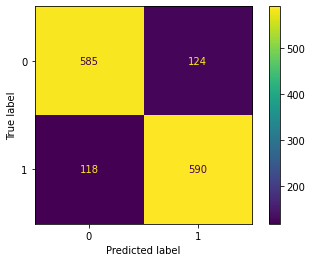

In [ ]:
plot_cm(mi_ex, xgb_mi)

## Random Forest

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier(random_state=RANDOM_STATE)

rf_tdf = gridsearch_model(tdf_downsample, 'y', rf, param_grid) 
rf_mi = gridsearch_model(mi_ex, 'y', rf, param_grid)
rf_re = gridsearch_model(rd_re, 'y', rf, param_grid)

In [ ]:
rf_re

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=42)

## Logistic Regression

In [ ]:
lg = LogisticRegression(random_state=RANDOM_STATE)

param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge

lg_tdf = gridsearch_model(tdf_downsample, 'y', lg, param_grid, scaled=True) 
lg_mi = gridsearch_model(mi_ex, 'y', lg, param_grid, scaled=True)
lg_re = gridsearch_model(rd_re, 'y', lg, param_grid, scaled=True)

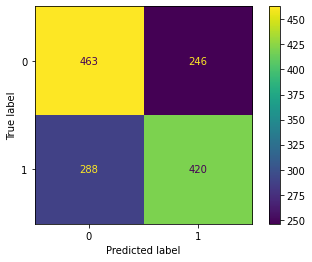

In [ ]:
plot_cm(mi_ex, lg_mi, scaled=True)

# Save Model

In [ ]:
import pickle
def save_model(fn, model):
  # save the model to disk
  filename = fn
  # filename = 'finalized_model.sav'
  pickle.dump(model, open(filename, 'wb'))

In [ ]:
models = ['xgb_tdf', 'xgb_mi', 'xgb_re', 'rf_tdf', 'rf_mi', 'rf_re', 'lg_tdf', 'lg_mi', 'lg_re']

In [ ]:
rf_re

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=42)

In [ ]:
for m in models:
  save_model(m + '.sav', locals()[m])
  print(locals()[m])

XGBClassifier(colsample_bytree=1.0, gamma=0.5, max_depth=4, random_state=42,
              subsample=0.8)
XGBClassifier(colsample_bytree=1.0, gamma=1, max_depth=5, random_state=42,
              subsample=0.8)
XGBClassifier(colsample_bytree=1.0, gamma=1, max_depth=5, random_state=42,
              subsample=0.8)
RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=42)
RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300, random_state=42)
RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=42)
LogisticRegression(random_state=42)
LogisticRegression(C=0.1, random_state=42)
LogisticRegression(C=0.001, random_state=42)


In [ ]:
filename = models[8] + '.sav'
print(filename)
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

lg_re.sav


LogisticRegression(C=0.001, random_state=42)

In [ ]:
print(loaded_model)

None


# Model Evaluation

In [ ]:
test_df = pd.read_csv('test.csv?raw=True')

In [ ]:
def get_df_name(df):
  if df.equals(tdf): 
    return 'tdf'
  elif df.equals(tdf_downsample):
    return 'tdf_downsample'
  elif df.equals(mi_ex): 
    return 'mi_ex'
  elif df.equals(rd_re): 
    return 'rd_re'
  else:
    return 'unknown'

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

def model1(test_df, df, model_fn, preprocess=preprocess_g, scaled=False):
  _, _, _, _, _, _, scaler = getXYScaler(df, 'y') # get scaler

  df_name = get_df_name(df)
  print(f'test model: {model_fn}, data use: {df_name}')
  model1 = pickle.load(open(model_fn, 'rb'))

  x_test = test_df.copy()
  x_test = preprocess(x_test)
  y_test = x_test['y']
  x_test = x_test.drop('y', axis=1)
  if(scaled): x_test = scaler.transform(x_test)
  y_logit = model1.predict_proba(x_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_logit)
  auc = metrics.roc_auc_score(y_test, y_logit)
  plt.figure(figsize=(30, 6))
  plt.subplot(151)
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.title(model_fn + ' | ' + df_name)
  plt.savefig(model_fn + ' | ' + df_name + '.png')
  # files.download(model_fn + ' | ' + df_name + '.png')

def submit(test_df, df, model, preprocess=None, scaled=False):
  _, _, _, _, _, _, scaler = getXYScaler(df, 'y') # get scaler

  x_test = test_df.copy()
  if(preprocess != None): x_test = preprocess(x_test)
  x_test = x_test.drop('y', axis=1)
  if(scaled): x_test = scaler.transform(x_test)
  y_pred = model.predict_proba(x_test) # use y_pred[:, 1]
  # print(np.array(y_pred)[:, 1])
  # y_pred = model.predict(x_test)
  sub = pd.DataFrame(np.array(y_pred)[:, 1], columns=['y'])
  sub['id'] = test_df['id']
  sub = sub[['id', 'y']]
  return sub

In [ ]:
files.download(model_fn + ' | ' +  + '.png')

test model: xgb_tdf.sav, data use: tdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

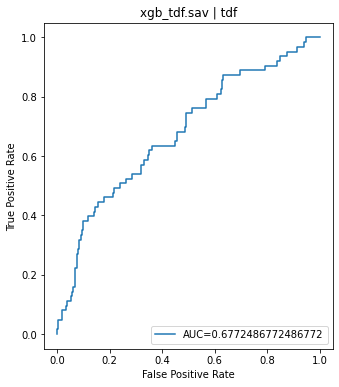

In [ ]:
model1(test_df, tdf, models[0] + '.sav')

test model: xgb_tdf.sav, data use: tdf_downsample


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: xgb_mi.sav, data use: mi_ex


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: xgb_re.sav, data use: rd_re


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: rf_tdf.sav, data use: tdf_downsample


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: rf_mi.sav, data use: mi_ex


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: rf_re.sav, data use: rd_re


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: lg_tdf.sav, data use: tdf_downsample


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: lg_mi.sav, data use: mi_ex


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test model: lg_re.sav, data use: rd_re


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

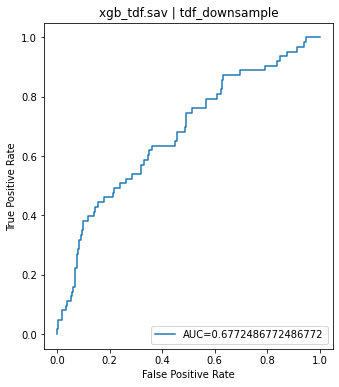

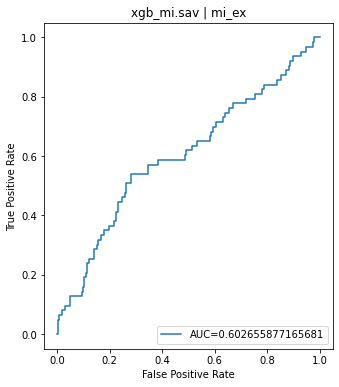

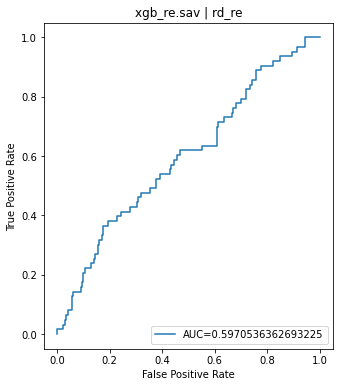

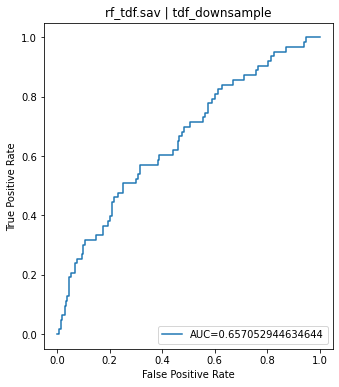

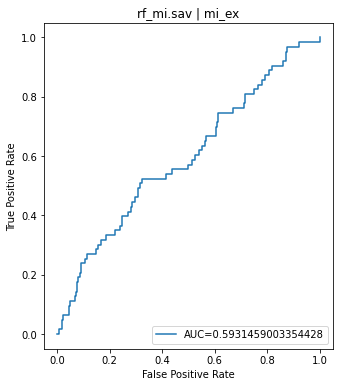

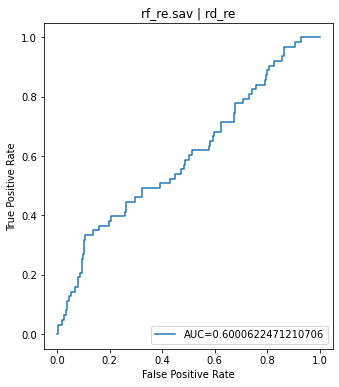

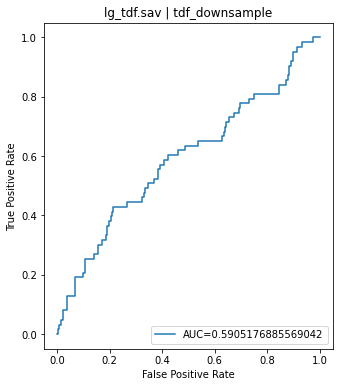

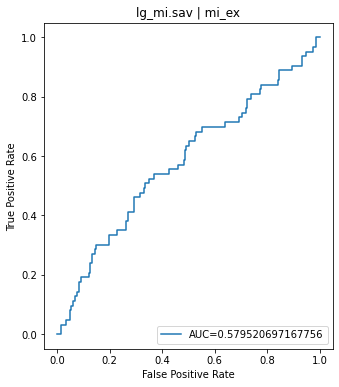

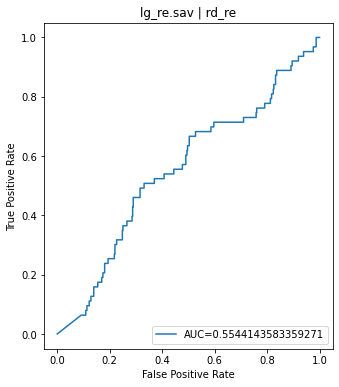

In [ ]:
for m in models:
  if(m[-2:] == 'df'):
    model1(test_df, tdf_downsample, m + '.sav')
  elif(m[-2:] == 'mi'):
    model1(test_df, mi_ex, m + '.sav')
  elif(m[-2:] == 're'):
    model1(test_df, rd_re, m + '.sav')

# Submit

In [ ]:
sample = pd.read_csv('submission_sample.csv?raw=True')
# sample.head()
sample

,id,y
0,4000,0.843403
1,4001,0.821234
2,4002,0.100092
3,4003,0.156351
4,4004,0.519778
...,...,...
517,4517,0.961197
518,4518,0.838783
519,4519,0.179647
520,4520,0.373208


In [ ]:
test_df = pd.read_csv('test.csv?raw=True')

In [ ]:
test_df.head()

In [ ]:
def submit(test_df, df, model, preprocess=None, scaled=False):
  _, _, _, _, _, _, scaler = getXYScaler(df, 'y') # get scaler

  x_test = test_df.copy()
  if(preprocess != None): x_test = preprocess(x_test)
  x_test = x_test.drop('y', axis=1)
  if(scaled): x_test = scaler.transform(x_test)
  y_pred = model.predict_proba(x_test) # use y_pred[:, 1]
  # print(np.array(y_pred)[:, 1])
  # y_pred = model.predict(x_test)
  sub = pd.DataFrame(np.array(y_pred)[:, 1], columns=['y'])
  sub['id'] = test_df['id']
  sub = sub[['id', 'y']]
  return sub

In [ ]:
submit(test_df, tdf_downsample, xgb_tdf, preprocess=preprocess_g).to_csv('submission_xgb_tdf.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission_xgb_tdf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submit(test_df, mi_ex, lg_mi, preprocess=preprocess_g, scaled=True).to_csv('sub2.csv', index=False)

In [ ]:
pd.read_csv('submission.csv')

,id,y
0,4000,0.388363
1,4001,0.573427
2,4002,0.398790
3,4003,0.311208
4,4004,0.265840
...,...,...
517,4517,0.346890
518,4518,0.489986
519,4519,0.154440
520,4520,0.747659


In [ ]:
pd.read_csv('sub2.csv')